## Basic setup

Next, update keras configuration to use Theano by default:

In [1]:
!mkdir -p ~/.keras
!echo '{"epsilon":1e-07,"floatx":"float32","backend":"theano", "image_dim_ordering": "th"}' > ~/.keras/keras.json

**Make sure to restart your kernel after the install to pick up the changes. In the Jupyter menu above, click on 'Kernel > Restart'.**

There isn't too much to do to get started - just a few simple configuration steps.

This shows plots in the web page itself - we always wants to use this when using jupyter notebook:

In [2]:
%matplotlib inline

A few basic libraries that we'll need for the initial exercises:

In [3]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

We have created a file most imaginatively called 'utils.py' to store any little convenience functions we'll want to use. We will discuss these as we use them.

In [4]:
import utils; reload(utils)
from utils import plots

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5110)
Using Theano backend.


# Use a pretrained VGG model with our **Vgg16** class

In [5]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64
no_of_epochs=3

In [6]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [7]:
path = '/datasets/fast.ai/dogscats/'
result_path = '/home/nbuser/courses/fastai/deeplearning1/results/'

In [8]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 645s - loss: 0.1238 - acc: 0.9692 - val_loss: 0.0585 - val_acc: 0.9860


In [10]:
vgg.model.save_weights(result_path+'result1.h5')

In [11]:
path = '/home/nbuser/courses/fastai/deeplearning1/'

In [12]:
batches, preds = vgg.test(path+'test', batch_size=batch_size*2)

Found 12500 images belonging to 1 classes.


In [16]:
#For every image, vgg.test() generates two probabilities 
#based on how we've ordered the cats/dogs directories.
#It looks like column one is cats and column two is dogs
preds[:5]

array([[  1.0000e+00,   1.1586e-10],
       [  1.0000e+00,   1.4895e-09],
       [  2.6011e-10,   1.0000e+00],
       [  9.9945e-01,   5.5055e-04],
       [  7.6629e-04,   9.9923e-01]], dtype=float32)

In [17]:
filenames = batches.filenames
filenames[:5]

['unknown/10592.jpg',
 'unknown/7217.jpg',
 'unknown/3653.jpg',
 'unknown/4382.jpg',
 'unknown/2924.jpg']

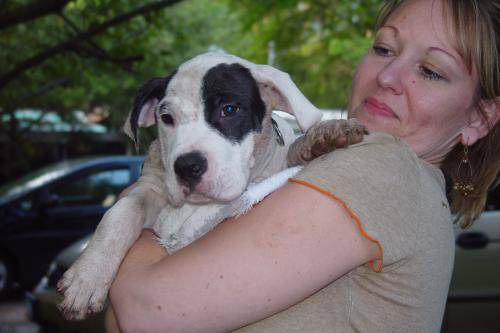

In [21]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open('/home/nbuser/courses/fastai/deeplearning1/test/' + filenames[2])